In [3]:

# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

!kaggle datasets download -d subhamjain/loan-prediction-based-on-customer-behavior

--2023-11-28 21:57:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-28 21:57:43 (107 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]

loan-prediction-based-on-customer-behavior.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
from helper_functions import *

In [7]:
# UNzip data
unzip_data('/content/loan-prediction-based-on-customer-behavior.zip')

# Preprocess data

## Visualize data

In [70]:
# Train and test dirs
train_df = pd.read_csv('/content/Training Data.csv')
test_df = pd.read_csv('/content/Test Data.csv')
test_df.shape, train_df.shape

((28000, 12), (252000, 13))

In [9]:
train_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [11]:
# Set columns to lowercase
train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

In [12]:
train_df.columns, test_df.columns

(Index(['id', 'income', 'age', 'experience', 'married/single',
        'house_ownership', 'car_ownership', 'profession', 'city', 'state',
        'current_job_yrs', 'current_house_yrs', 'risk_flag'],
       dtype='object'),
 Index(['id', 'income', 'age', 'experience', 'married/single',
        'house_ownership', 'car_ownership', 'profession', 'city', 'state',
        'current_job_yrs', 'current_house_yrs'],
       dtype='object'))

In [13]:
train_df = train_df.drop(columns=['id'])

In [14]:
train_df.head()

,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [15]:
# Change married/single because the / will create problems in the future
train_df = train_df.rename(columns={"married/single":"married_single",})
train_df.columns

Index(['income', 'age', 'experience', 'married_single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

In [16]:
train_df['city'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [17]:
train_df['city'] = train_df['city'].str.replace(r'\[.*?\]', '')


<ipython-input-17-b426aef387ea>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['city'] = train_df['city'].str.replace(r'\[.*?\]', '')


In [18]:
train_df['city'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'North_Dumdum', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'A

In [19]:
train_df['state'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [20]:
train_df['state'] = train_df['state'].str.replace(r'\[.*?\]', '')

<ipython-input-20-191901c9c108>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['state'] = train_df['state'].str.replace(r'\[.*?\]', '')


In [21]:
train_df['state'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Manipur', 'Sikkim'], dtype=object)

In [22]:
train_df['risk_flag'].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

<Axes: >

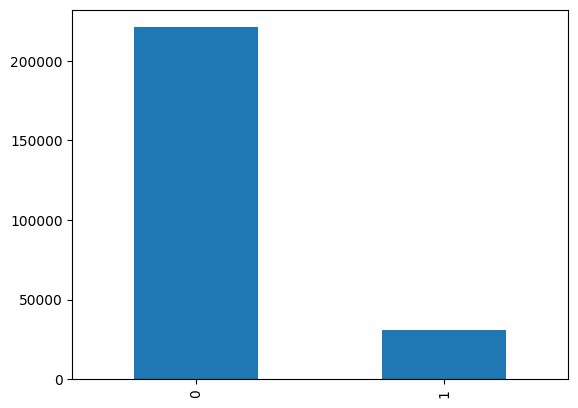

In [23]:
train_df['risk_flag'].value_counts().plot(kind="bar")

## Encode non-numerical values

In [24]:
train_df_one_hot = pd.get_dummies(train_df)
train_df_one_hot.head()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag,married_single_married,married_single_single,house_ownership_norent_noown,house_ownership_owned,...,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttarakhand,state_West_Bengal
0,1303834,23,3,3,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,3,14,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
train_df_one_hot.tail()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag,married_single_married,married_single_single,house_ownership_norent_noown,house_ownership_owned,...,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttarakhand,state_West_Bengal
251995,8154883,43,13,6,11,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
251996,2843572,26,10,6,11,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
251997,4522448,46,7,7,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
251998,6507128,45,0,0,10,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
251999,9070230,70,17,7,11,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
# Create x and y values
X = train_df_one_hot.drop('risk_flag', axis=1)
y = train_df_one_hot['risk_flag']

In [27]:
X.head()

,income,age,experience,current_job_yrs,current_house_yrs,married_single_married,married_single_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,...,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttarakhand,state_West_Bengal
0,1303834,23,3,3,13,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,3,14,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


# Start training process

In [28]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
len(X_train), len(X_test), len(y_train), len(y_test)

(201600, 50400, 201600, 50400)

## Model 1

In [29]:
from tensorflow.keras import layers, Sequential
tf.random.set_seed(42)

model_1 = Sequential([
    layers.Dense(1),
    layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
6300/6300 [==============================] - 25s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/10
6300/6300 [==============================] - 18s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/10
6300/6300 [==============================] - 22s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/10
6300/6300 [==============================] - 18s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/10
6300/6300 [==============================] - 21s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/10
6300/6300 [==============================] - 18s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/10
6300/6300 [==============================] - 21s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/10
6300/6300 [==============================] - 19s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/10
6300/

## Model 2

In [30]:
tf.random.set_seed(42)

model_2 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history_model_2 = model_2.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)


Epoch 1/5
6300/6300 [==============================] - 23s 3ms/step - loss: 12335.8848 - mae: 12335.8848 - val_loss: 7728.6719 - val_mae: 7728.6719
Epoch 2/5
6300/6300 [==============================] - 20s 3ms/step - loss: 4073.8921 - mae: 4073.8921 - val_loss: 2089.9573 - val_mae: 2089.9573
Epoch 3/5
6300/6300 [==============================] - 21s 3ms/step - loss: 1459.5649 - mae: 1459.5649 - val_loss: 498.5191 - val_mae: 498.5191
Epoch 4/5
6300/6300 [==============================] - 20s 3ms/step - loss: 282.7407 - mae: 282.7407 - val_loss: 95.1396 - val_mae: 95.1396
Epoch 5/5
6300/6300 [==============================] - 21s 3ms/step - loss: 29.7814 - mae: 29.7814 - val_loss: 5.8929 - val_mae: 5.8929


In [31]:
model_2_eval = model_2.evaluate(X_test, y_test)
model_2_eval

1575/1575 [==============================] - 3s 2ms/step - loss: 5.8929 - mae: 5.8929


[5.8928728103637695, 5.8928728103637695]

Text(0.5, 0, 'epochs')

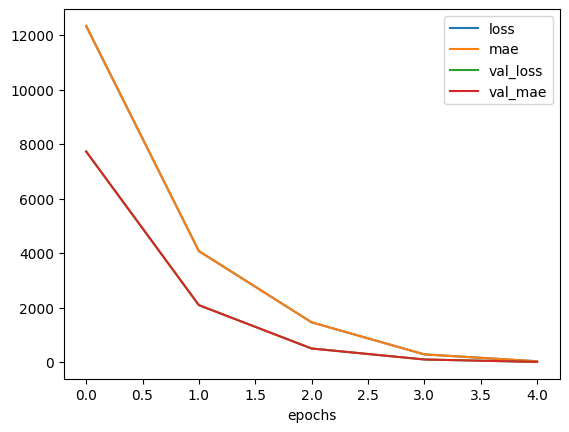

In [32]:
# PLot loss curve
pd.DataFrame(history_model_2.history).plot()
plt.xlabel('loss')
plt.xlabel('epochs')

# Model 3
Same as model 2, but trained for longer

In [33]:
tf.random.set_seed(42)

model_3 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history_model_3 = model_3.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
6300/6300 [==============================] - 23s 3ms/step - loss: 15540.8887 - mae: 15540.8887 - val_loss: 6148.7329 - val_mae: 6148.7329
Epoch 2/10
6300/6300 [==============================] - 20s 3ms/step - loss: 5020.5913 - mae: 5020.5913 - val_loss: 446.4482 - val_mae: 446.4482
Epoch 3/10
6300/6300 [==============================] - 21s 3ms/step - loss: 1914.7283 - mae: 1914.7283 - val_loss: 1188.3021 - val_mae: 1188.3021
Epoch 4/10
6300/6300 [==============================] - 20s 3ms/step - loss: 850.3743 - mae: 850.3743 - val_loss: 272.2110 - val_mae: 272.2110
Epoch 5/10
6300/6300 [==============================] - 21s 3ms/step - loss: 334.4455 - mae: 334.4455 - val_loss: 106.7897 - val_mae: 106.7897
Epoch 6/10
6300/6300 [==============================] - 20s 3ms/step - loss: 52.8648 - mae: 52.8648 - val_loss: 3.3697 - val_mae: 3.3697
Epoch 7/10
6300/6300 [==============================] - 21s 3ms/step - loss: 2.6457 - mae: 2.6457 - val_loss: 0.1243 - val_mae: 0.1243
E

In [34]:
model_3_eval = model_3.evaluate(X_test, y_test)
model_3_eval

1575/1575 [==============================] - 3s 2ms/step - loss: 0.2036 - mae: 0.2036


[0.203583225607872, 0.203583225607872]

Text(0.5, 0, 'epochs')

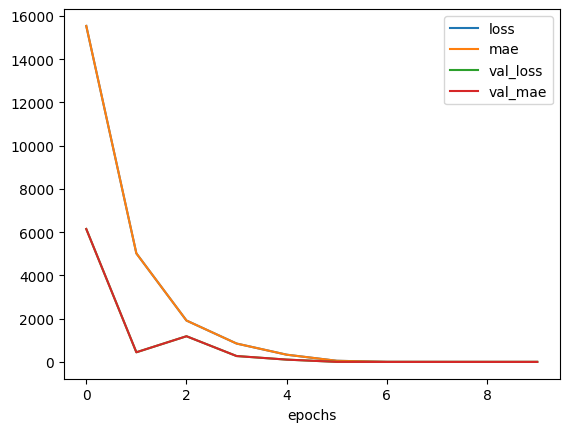

In [35]:
# PLot loss curve
pd.DataFrame(history_model_3.history).plot()
plt.xlabel('loss')
plt.xlabel('epochs')

# Preprocessing data (normalization and standardization)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

train_df_no_norm =  train_df
train_df_no_norm.head()

,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1


In [37]:
train_df_no_norm.columns

Index(['income', 'age', 'experience', 'married_single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns for normalization
numerical_columns = [col for col in train_df_one_hot.columns]

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected numerical columns
train_df_one_hot[numerical_columns] = scaler.fit_transform(train_df_one_hot[numerical_columns])

# Now, train_df_one_hot contains normalized values for the specified numerical columns


In [39]:
# Create X & y
X = train_df_one_hot.drop('risk_flag', axis=1)
y = train_df_one_hot['risk_flag']



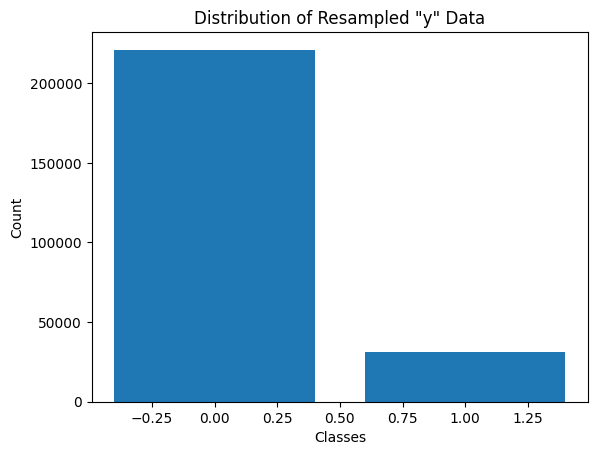

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
y = pd.Series(y)
value_counts = y.value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Resampled "y" Data')

# Display the plot
plt.show()

In [41]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
X,y=sm.fit_resample(X,y)

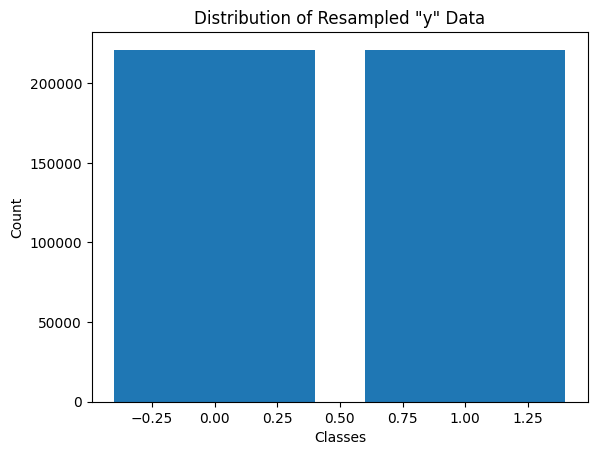

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
y = pd.Series(y)
value_counts = y.value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Resampled "y" Data')

# Display the plot
plt.show()

In [42]:
# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
len(X_train), len(X_test), len(y_train), len(y_test)

(353606, 88402, 353606, 88402)

## Model 4
Same as model 3, but with normalized data

In [ ]:
tf.random.set_seed(42)

model_4 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history_model_4 = model_4.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


In [ ]:
model_4_results = model_4.evaluate(X_test, y_test)
model_4_results

In [ ]:
model_3_eval

In [ ]:
model_3_eval[1] == model_4_results[1]

In [ ]:
model_4_preds = model_4.predict(X_test)
model_4_preds

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_test is the actual labels for your test set

# Convert predicted probabilities to binary predictions using a threshold
new_threshold = 0.5
binary_predictions = (model_4_preds >= new_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, binary_predictions)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, binary_predictions)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, binary_predictions)
print(f'F1 Score: {f1:.4f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print('Confusion Matrix:')
print(conf_matrix)


In [ ]:
import pandas as pd

# Assuming X_test is your DataFrame
# model_4_preds is your array of predicted probabilities

# Create a new DataFrame to store the results
results_df = pd.DataFrame(X_test)  # You can modify this if X_test has an index

# Add a new column for predicted probabilities
results_df['predicted_prob'] = model_4_preds

# Display the DataFrame with predicted probabilities
print(results_df.head())

In [ ]:
train_df.head()

# Lets improve model

# Model 5

In [44]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
model_5 = Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_5.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history_model_5 = model_5.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

# # tf.random.set_seed(42)

# model_5 = Sequential([
#     layers.Dense(100, activation='relu'),
#     layers.Dense(10),
#     layers.Dense(1)
# ])

# model_5.compile(
#     loss = tf.keras.losses.mae,
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=['mae']
# )

# history_model_5 = model_5.fit(
#     X_train,
#     y_train,
#     epochs=10,
#     validation_data=(X_test, y_test)
# )


Epoch 1/10
11051/11051 [==============================] - 46s 4ms/step - loss: 0.2059 - mae: 0.2059 - val_loss: 0.1519 - val_mae: 0.1519
Epoch 2/10
11051/11051 [==============================] - 45s 4ms/step - loss: 0.1381 - mae: 0.1381 - val_loss: 0.1294 - val_mae: 0.1294
Epoch 3/10
11051/11051 [==============================] - 44s 4ms/step - loss: 0.1238 - mae: 0.1238 - val_loss: 0.1301 - val_mae: 0.1301
Epoch 4/10
11051/11051 [==============================] - 45s 4ms/step - loss: 0.1146 - mae: 0.1146 - val_loss: 0.1145 - val_mae: 0.1145
Epoch 5/10
11051/11051 [==============================] - 63s 6ms/step - loss: 0.1082 - mae: 0.1082 - val_loss: 0.1124 - val_mae: 0.1124
Epoch 6/10
11051/11051 [==============================] - 59s 5ms/step - loss: 0.1043 - mae: 0.1043 - val_loss: 0.1100 - val_mae: 0.1100
Epoch 7/10
11051/11051 [==============================] - 44s 4ms/step - loss: 0.1013 - mae: 0.1013 - val_loss: 0.1049 - val_mae: 0.1049
Epoch 8/10
11051/11051 [=================

In [72]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               52224     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 62593 (244.50 KB)
Trainable params: 62593 (244.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model_5_preds = model_5.predict(X_test)

2763/2763 [==============================] - 5s 2ms/step


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_test is the actual labels for your test set
def calculate_metrics_results(model_preds):
  # Convert predicted probabilities to binary predictions using a threshold
  new_threshold = 0.5
  binary_predictions = (model_preds >= new_threshold).astype(int)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, binary_predictions)
  print(f'Accuracy: {accuracy:.4f}')

  # Calculate precision
  precision = precision_score(y_test, binary_predictions)
  print(f'Precision: {precision:.4f}')

  # Calculate recall
  recall = recall_score(y_test, binary_predictions)
  print(f'Recall: {recall:.4f}')

  # Calculate F1 score
  f1 = f1_score(y_test, binary_predictions)
  print(f'F1 Score: {f1:.4f}')

  # Calculate confusion matrix
  conf_matrix = confusion_matrix(y_test, binary_predictions)
  print('Confusion Matrix:')
  print(conf_matrix)

In [51]:
calculate_metrics_results(model_5_preds)

Accuracy: 0.9033
Precision: 0.8834
Recall: 0.9287
F1 Score: 0.9054
Confusion Matrix:
[[38918  5405]
 [ 3145 40934]]


## Make predictions

In [53]:
model_5_preds_probs = model_5.predict(X_test)

2763/2763 [==============================] - 5s 2ms/step


In [54]:
model_5_preds_probs[:10]

array([[0.00170862],
       [0.0016446 ],
       [0.00233859],
       [0.00548275],
       [0.00341311],
       [0.00235603],
       [1.0045428 ],
       [1.0062393 ],
       [1.0063013 ],
       [0.99640846]], dtype=float32)

In [56]:
model_5_preds = tf.squeeze(tf.round(model_5_preds_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1.], dtype=float32)>

In [58]:
X_train


,income,age,experience,current_job_yrs,current_house_yrs,married_single_married,married_single_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,...,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttarakhand,state_West_Bengal
0,0.129487,0.034483,0.15,0.214286,0.75,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.757206,0.327586,0.50,0.642857,0.75,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.398564,0.775862,0.20,0.285714,0.00,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.625263,0.344828,0.10,0.142857,0.50,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.576454,0.448276,0.55,0.214286,1.00,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442003,0.980714,0.275862,0.00,0.000000,0.75,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
442004,0.649328,0.103448,0.05,0.071429,1.00,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
442005,0.872613,0.431034,0.45,0.357143,0.00,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
442006,0.168443,0.431034,0.40,0.571429,1.00,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
